# Librerias

In [1]:
library(bnlearn)
library(Rgraphviz)

Loading required package: graph

Loading required package: BiocGenerics

Loading required package: parallel



Error in setMethod("path", cl, where = topenv(parent.frame()), function(object,  : 
  the environment 'base' is locked; cannot assign methods for function 'path'



Attaching package: 'BiocGenerics'


The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from 'package:bnlearn':

    path, score


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min




Error in setMethod("nodes", cl, where = topenv(parent.frame()), function(object) .nodes(object)) : 
  the environment 'base' is locked; cannot assign methods for function 'nodes'



Attaching package: 'graph'


The following objects are masked from 'package:bnlearn':

    degree, nodes, nodes<-


Loading required package: grid



# Datos

In [2]:
# tabla = read.csv("data/ARIA_cleaned/PlanRT.csv", row.names=1)
tabla = read.csv("data/ARIA_cleaned/Sch_categ.csv", row.names=1)

cols = names(tabla)
length(cols)

tabla[cols] <- lapply(tabla[cols], factor)
tabla = tabla[cols]

dim(tabla)
head(tabla)

[1] 60

[1] 19844    60

,ActivityCategoryCode,Duration,NotificationPriorTimeFlag_x,NoEditFlag_x,NotificationPriorTimeFlag_y,ResourceGroupSer,Description,PatientStatus,Priority,AssignableFlag,...,TStage,ObjectStatus_y_4,TumorSize,NStage,DiagnosisCode_sec,SummaryStage,ClinicalStatus,ObjectStatus_sec,DiagnosisCode,HistologyCode_sec
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
54,Treatment,10,0,1,0,12.0,isNaN,Paciente Ingresado,Medium,1,...,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,ACTIVE,isNaN,isNaN,isNaN
55,Treatment,10,0,1,0,12.0,isNaN,Paciente Ingresado,Medium,1,...,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,ACTIVE,isNaN,isNaN,isNaN
56,Treatment,10,0,1,0,12.0,isNaN,Paciente Ingresado,Medium,1,...,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,ACTIVE,isNaN,isNaN,isNaN
57,Treatment,10,0,1,0,12.0,isNaN,Paciente Ingresado,Medium,1,...,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,ACTIVE,isNaN,isNaN,isNaN
62,Treatment,10,0,1,0,12.0,isNaN,Paciente Ingresado,Medium,1,...,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,ACTIVE,isNaN,isNaN,isNaN
663,Treatment,30,0,0,0,isNaN,isNaN,Paciente Ingresado,Medium,1,...,3a,Active,isNaN,1,isNaN,IIB,ACTIVE,isNaN,C61,isNaN


In [11]:
resample_train = function(tabla, r, n){
    h = vector(mode="list")
    m = nrow(tabla)
    cat("Nº filas en cada resampling:", round(m*r))
    for(i in 1:n){
        i = sample(m, size = round(m*r), replace = FALSE)

        options(warn=-1)
        dag <- hc(tabla[i,])
        strength = arc.strength(dag, data = tabla[i,], criterion = "bic") # x2, aic...
        # score = bnlearn::score(dag, data = tabla[i,], type = "bic")
        # uves = vstructs(dag)
        options(warn=0)

        rank = t(apply(strength[,1:2], 1, sort))
        for(i in 1:nrow(rank)){
            nombre = paste(rank[i,1], rank[i,2], sep=" <-> ")
            if(is.null(h[[nombre]])){
                h[[nombre]] = c(i)
            }else{
                h[[nombre]] = c(h[[nombre]], i)
            }
        }
    }
    return(h)
}

In [12]:
aa = resample_train(tabla, 0.1, 20)
aa

Nº filas en cada resampling: 1984

$`EquipmentSer <-> InterfaceStamp`
 [1] 1 1 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 1 1 2

$`NoEditFlag_x <-> ResourceGroupSer`
 [1] 2 2 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 1

$`ActivityCode <-> ResourceGroupSer`
[1] 3 3 3 3 3 3

$`NoFractions <-> TreatmentIntentType`
 [1] 4 4 5 4 4 4 5 5 5 4 4 4 5 4 4 4 4 4 4 4

$`ActivityCode <-> AssignableFlag`
 [1] 5 5 4 5 5 5 4 4 4 5 5 5 4 5 5 5 5 5 5 5

$`NoFractions <-> PrescribedDose`
 [1] 6 6 7 6 6 6 6 6 6 8 6 6 7 6 7 6 7 6 6 6

$`DiagnosisCode <-> ObjectStatus_y_4`
 [1] 7 7 6 7 7 7 7 7 7 7 7 7 6 7 6 7 6 7 7 7

$`Duration <-> ScheduledDuration`
 [1] 8 9 9 9 9 9 9 8 8 9 9 9 8 9 9 9 9 9 9 9

$`MStage <-> SummaryStage`
 [1]  9 15 10 12 10 11 10 14 15 19 10 15 15 12 10 18 17 10 20 19

$`DiagnosisCode <-> NoFractions`
 [1] 10  8  8  8  8  8  8  9  9  6  8  8  9  8  8  8  8  8  8  8

$`Intent <-> SkinFlashMargin`
 [1] 11 10 13 10 15 12 11 10 13 12 11 10 13 11 11 10 13 16 10 12

$`SimulationNeeded <-> Status_y`
 [1] 12 11 14 11 11 13 12 11 10 10 12 11 10 13 13 11 11 11 11 10

$`PhaseType <-> SimulationNeeded`
 [1] 13 12 15 13 13 14 13 12 11 11 13 12 11 14 14 12 12 12 12 11

$`CalcModelOptionsLen <-> MultiFieldOptFlag`
 [1] 14 13 11 15 12 10 14 15 12 13 14 14 14 10 12 13 14 13 14

$`SimulationNeeded <-> Technique`
 [1] 15 14 16 14 14 15 15 13 14 14 15 13 12 15 15 14 14 15 14 13

$`PlanNormMethod <-> SkinFlashMargin`
 [1] 16 17 18 19 20 19 18 18 19 17 19 17 18 18 17 15 19 20 15 18

$`NumberOfFractions <-> SimulationNeeded`
 [1] 17 16 17 17 17 17 17 17 17 16 17 16 16 17 16 17 15 17 18 16

$`CalcModelOptionsLen <-> PrimaryPTVSer`
 [1] 18 19 19 16 18 16 19 16 16 18 18 19 19 16 18 16 16 21 17 15

$`SimulationNeeded <-> Site`
 [1] 19 20 20 20 19 20 20 19 18 20 20 18 17 20 20 19 18 19 19 17

$`CalcModelOptions <-> PrimaryPTVSer`
 [1] 20 21 21 21 21 21 20 21 21 21 23 22 21 22 20 20 21 20

$`PrimaryPTVSer <-> SimulationNeeded`
 [1] 21 22 23 22 22 22 23 21 22 22 22 21 24 22 23 22 23 24 22 22

$`ActivityCode <-> DefaultDuration`
 [1] 22 25 26 25 24 24 24 25 24 23 24 24 21 24 24 24 26 25 25 24

$`NoFractions <-> TStage`
 [1] 23 18 21 18 16 18 16 22 20 15 16 20 20 19 19 21 21 18 16 21

$`ObjectStatus_y_4 <-> SummaryStage`
 [1] 24 23 24 23 23 23 22 23 23 23 22 23 23 21 23 24 22 23 23

$`ActivityCode <-> Description`
 [1] 25 26 25 24 26 25 25 24 25 26 26 26 25 25 26 25 25 26 26 25

$`NoFractions <-> NStage`
 [1] 26 24 27 26 25 26 26 26 26 24 25 25 26 26 25 26 27 27 24 26

$`EquipmentSer <-> MultiFieldOptFlag`
 [1] 27 27 28 28 27 28 28 28 28 28 28 27 27 27 27 27 28 28 27 28

$`DiagnosisCode_sec <-> ObjectStatus_sec`
 [1] 28 28 29 27 28 27 27 27 27 27 27 28 28 28 28 28 29 29 28 27

$`DefaultDuration <-> Duration`
 [1] 29 32 35 32 29 33 30 31 29 36 30 30 29 36 36 30 32 32 31 34

$`ClinicalStatus <-> EquipmentSer`
 [1] 30 29 30 29 30 29 29 29 30 29 29 29 30 29 29 29 30 30 29 29

$`MultiFieldOptFlag <-> PlanNormFactor`
 [1] 31 31 31 31 31 30 32 32 31 30 32 32 31 30 30 32 31 31 30 30

$`DicomSeqNumber <-> PrescribedPercentage`
 [1] 32 33 32 34 32 31 34 34 32 32 33 34 32 31 31 34 35 33 34 32

$`PrescribedPercentage <-> Status_x`
 [1] 33 34 33 35 33 32 35 35 33 33 34 35 33 32 32 35 36 34 35 33

$`MultiFieldOptFlag <-> TreatmentOrientation`
 [1] 34 36 36 36 36 35 33 37 34 31 36 31 35 34 34 33 34 35 32 35

$`DicomSeqNumber <-> MultiFieldOptFlag`
 [1] 35 35 34 37 34 34 36 35 35 35 36 36 33 35 36 36 36 36

$`DiagnosisCode <-> Sex`
 [1] 36 30 37 30 35 36 31 30 36 34 31 33 34 35 33 31 33 37 33 31

$`NoEditFlag_x <-> PrescribedDose`
 [1] 37 37 39 38 38 39 37 33 37 38 38 37 37 38 37 37 38 39 38 37

$`MultiFieldOptFlag <-> NoFractions`
 [1] 38 38 38 39 37 38 38 41 38 39 40 40 38 37 38 38 41 38 37 39

$`ActivityCategoryCode <-> ResourceGroupSer`
 [1] 39 43 44 43 48 43 43 43 42 42 44 44 43 39 46 45 44 42 44 45

$`MStage <-> ObjectStatus_sec`
 [1] 40 40 40 41 41 37 40 39 41 41 41 41 39 40 43 39 40 43 42 38

$`ActualDuration <-> DefaultDuration`
[1] 41 39 40 40 39 41 42 40

$`HistologyCode <-> TumorSize`
 [1] 42 41 42 33 39 41 41 38 37 37 

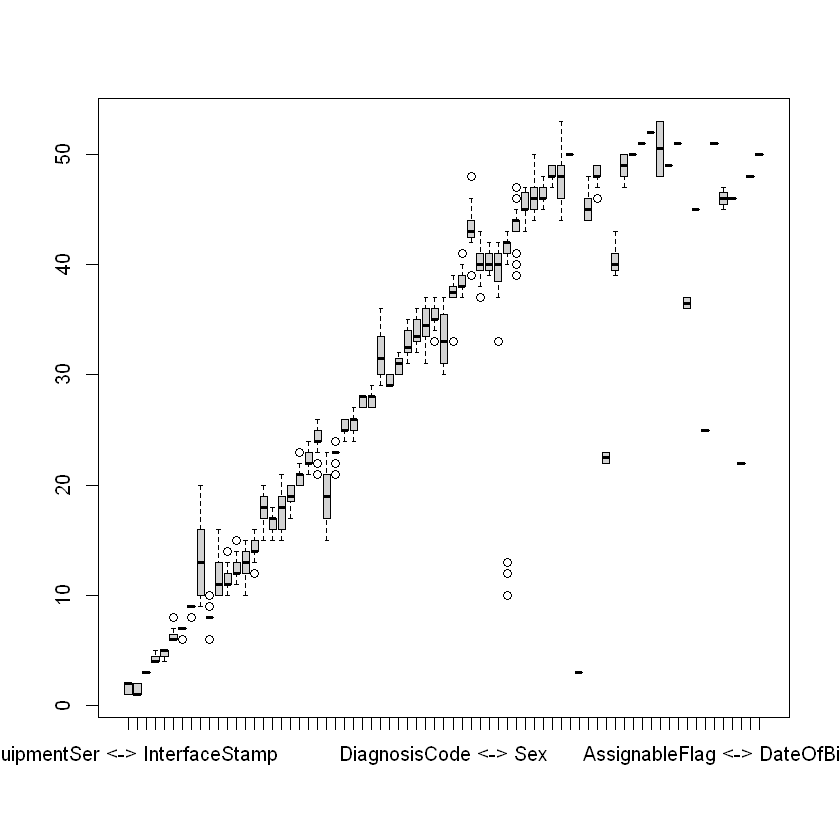

In [13]:
bp = boxplot(aa)

In [14]:
dag <- hc(tabla)
strength = arc.strength(dag, data = tabla, criterion = "bic")

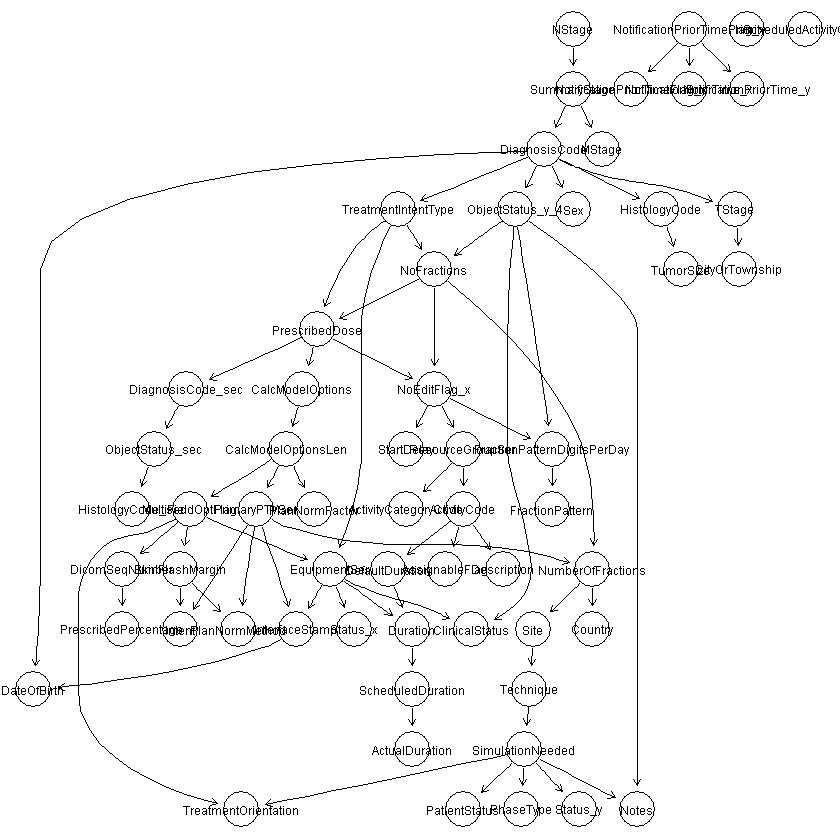

In [15]:
g <- Rgraphviz::layoutGraph(bnlearn::as.graphNEL(dag))
graph::nodeRenderInfo(g) <- list(fontsize=70)
Rgraphviz::renderGraph(g)